In [ ]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

# Buscar imágenes de boletas de servicios

Para entrenar el modelo de imágenes, primero se necesita descargar imágenes. Desde duckduckgo.com, la función `search_images()` descargará hasta 200 imagenes por defecto.

In [ ]:
from fastcore.all import *
import time

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

Por ejemplo, el siguiente código descarga una imagen de boleta:

In [ ]:
urls = search_images('cat photos', max_images=1)
urls[0]

'https://thefunnybeaver.com/wp-content/uploads/2020/08/adorable-cat-group.jpg'

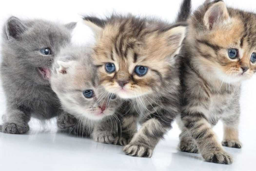

In [ ]:
from fastdownload import download_url
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = ['cat']
path = Path('cat_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

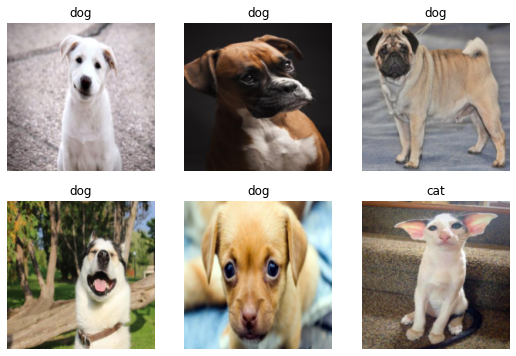

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.114499,0.182197,0.103896,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.183029,0.059750,0.012987,00:51
1,0.152669,0.026268,0.012987,00:52
2,0.111043,0.027403,0.012987,00:52


In [ ]:
is_cats,_,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 0.9989


This is a: cat.
Probability it's a cat: 0.5954


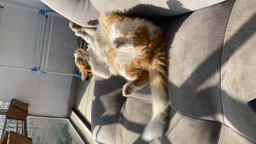

In [ ]:
test = '/content/beto1.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: dog.
Probability it's a cat: 0.1659


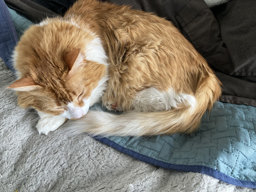

In [ ]:
test = '/content/beto2.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: cat.
Probability it's a cat: 0.9979


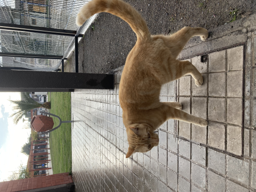

In [ ]:
test = '/content/gato1.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: cat.
Probability it's a cat: 0.9962


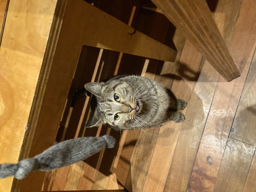

In [ ]:
test = '/content/gato2.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: dog.
Probability it's a cat: 0.1426


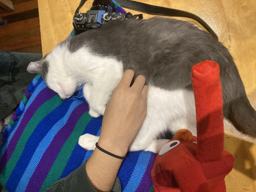

In [ ]:
test = '/content/gato3.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: cat.
Probability it's a cat: 1.0000


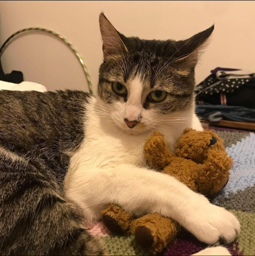

In [ ]:
test = '/content/gato4.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: dog.
Probability it's a cat: 0.2050


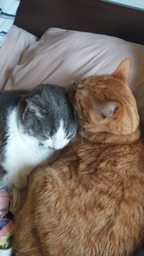

In [ ]:
test = '/content/gato5.JPG'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)

This is a: dog.
Probability it's a cat: 0.0006


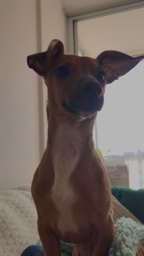

In [ ]:
test = '/content/perro1.jpeg'
is_cats,_,probs = learn.predict(PILImage.create(test))
print(f"This is a: {is_cats}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
im = Image.open(test)
im.to_thumb(256,256)